Feature Engineering

In [77]:
import pandas as pd

In [78]:


# Correct file path
data = pd.read_csv("/home/any1/Documents/I2_Data_Science/Final_Project/data/processed_v2_eda_student_depression.csv")
# Display the first few rows of the dataset
print(data.head())


   id  Gender   Age           City Profession  Academic Pressure  \
0   2    Male  33.0  Visakhapatnam    Student                5.0   
1   8  Female  24.0      Bangalore    Student                2.0   
2  26    Male  31.0       Srinagar    Student                3.0   
3  30  Female  28.0       Varanasi    Student                3.0   
4  32  Female  25.0         Jaipur    Student                4.0   

   Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  Sleep Duration  \
0            0.0  8.97                 2.0               0.0             2.0   
1            0.0  5.90                 5.0               0.0             2.0   
2            0.0  7.03                 5.0               0.0             1.0   
3            0.0  5.59                 2.0               0.0             3.0   
4            0.0  8.13                 3.0               0.0             2.0   

  Dietary Habits   Degree Have you ever had suicidal thoughts ?  \
0        Healthy  B.Pharm                  

In [79]:
# Preview the data
data.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,2.0,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,2.0,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,1.0,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,3.0,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,2.0,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [80]:
# Create Total Pressure feature
data['Total Pressure'] = data['Academic Pressure'] + data['Work Pressure']

In [81]:
# Bin CGPA into categories
data['CGPA_Category'] = pd.cut(data['CGPA'], bins=[0, 5, 7, 10], labels=['Low', 'Medium', 'High'])

In [82]:
# Normalize CGPA
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data['CGPA_normalized'] = scaler.fit_transform(data[['CGPA']])

In [83]:
from sklearn.preprocessing import LabelEncoder

# Columns to encode
categorical_columns = ['Gender', 'City', 'Profession', 'Dietary Habits', 
                       'Degree', 'Have you ever had suicidal thoughts ?', 
                       'Family History of Mental Illness']

# Apply Label Encoding
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le  # Save encoder for reverse mapping


In [84]:
# Identify important features using mutual information
from sklearn.feature_selection import mutual_info_classif

In [85]:
X = data.drop(['Depression', 'id'], axis=1)
y = data['Depression']

In [86]:
print(X.dtypes)


Gender                                      int64
Age                                       float64
City                                        int64
Profession                                  int64
Academic Pressure                         float64
Work Pressure                             float64
CGPA                                      float64
Study Satisfaction                        float64
Job Satisfaction                          float64
Sleep Duration                            float64
Dietary Habits                              int64
Degree                                      int64
Have you ever had suicidal thoughts ?       int64
Work/Study Hours                          float64
Financial Stress                          float64
Family History of Mental Illness            int64
Total Pressure                            float64
CGPA_Category                            category
CGPA_normalized                           float64
dtype: object


In [87]:
# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

In [88]:
# Calculate feature importance
importance = mutual_info_classif(X_encoded, y)
feature_importance = pd.Series(importance, index=X_encoded.columns)
print(feature_importance.sort_values(ascending=False))

ValueError: Input X contains NaN.

In [89]:
import numpy as np
import pandas as pd

numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = X.select_dtypes(include=['category', 'object']).columns

print("Numerical Columns: ")
print("Any NaN values:", np.any(np.isnan(X[numerical_columns])))
print("Any infinite values:", np.any(np.isinf(X[numerical_columns])))

print("Categorical Columns: ")
print("Any NaN values:", X[categorical_columns].isna().any())

X[numerical_columns] = X[numerical_columns].replace([np.inf, -np.inf], np.nan)
X = X.dropna()


Numerical Columns: 
Any NaN values: False
Any infinite values: False
Categorical Columns: 
Any NaN values: CGPA_Category    False
dtype: bool


Machine Learning Implementation

In [90]:
import pandas as pd
from sklearn.model_selection import train_test_split

file_path = "/home/any1/Documents/I2_Data_Science/Final_Project/data/processed_v2_eda_student_depression.csv"

# Load the dataset
df = pd.read_csv(file_path)

# Print the column names to identify the correct target column
print("Columns in the dataset:", df.columns)

# Replace 'Depression' with the actual name of your target column
X_encoded = df.drop(columns=['Depression'])  # Dropping the target column
y = df['Depression']  # Target column

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Now you can continue with your model training


Columns in the dataset: Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')


In [91]:
from sklearn.impute import SimpleImputer


# Assuming 'data' is your dataframe
if data.empty:
    print("DataFrame is empty.")
else:
    numeric_columns = data.select_dtypes(include=['number']).columns
    categorical_columns = data.select_dtypes(include=['object']).columns

    if numeric_columns.empty:
        print("No numeric columns to impute.")
    else:
        # Impute missing values in numeric columns using the mean strategy
        imputer_numeric = SimpleImputer(strategy='mean')
        data[numeric_columns] = imputer_numeric.fit_transform(data[numeric_columns])

    if categorical_columns.empty:
        print("No categorical columns to impute.")
    else:
        # Impute missing values in categorical columns using the most_frequent strategy
        imputer_categorical = SimpleImputer(strategy='most_frequent')
        data[categorical_columns] = imputer_categorical.fit_transform(data[categorical_columns])

    print(data)


No categorical columns to impute.
             id  Gender   Age  City  Profession  Academic Pressure  \
0           2.0     1.0  33.0  51.0        11.0                5.0   
1           8.0     0.0  24.0   3.0        11.0                2.0   
2          26.0     1.0  31.0  44.0        11.0                3.0   
3          30.0     0.0  28.0  49.0        11.0                3.0   
4          32.0     0.0  25.0  16.0        11.0                4.0   
...         ...     ...   ...   ...         ...                ...   
27896  140685.0     0.0  27.0  45.0        11.0                5.0   
27897  140686.0     1.0  27.0  25.0        11.0                2.0   
27898  140689.0     1.0  31.0   9.0        11.0                3.0   
27899  140690.0     0.0  18.0  25.0        11.0                5.0   
27900  140699.0     1.0  27.0  38.0        11.0                4.0   

       Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  ...  \
0                0.0  8.97                 2.0      

In [92]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

data = load_iris()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model_lr = LogisticRegression(max_iter=200)
model_lr.fit(X_train, y_train)

y_pred_lr = model_lr.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy of Logistic Regression: {accuracy:.4f}")


Accuracy of Logistic Regression: 1.0000


In [93]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Train the Decision Tree model
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)

# Predict using the trained model
y_pred_dt = model_dt.predict(X_test)

# Print classification report (no multi_class argument here)
print("Decision Tree Report:")
print(classification_report(y_test, y_pred_dt))

# For ROC-AUC in multi-class, we need to use the 'predict_proba' method
y_prob_dt = model_dt.predict_proba(X_test)

# Calculate and print ROC-AUC score
print(f"Decision Tree ROC-AUC: {roc_auc_score(y_test, y_prob_dt, multi_class='ovr', average='macro')}")


Decision Tree Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Decision Tree ROC-AUC: 1.0


In [94]:
import pandas as pd

# Assuming X is a NumPy array, you can convert it to a DataFrame
X_df = pd.DataFrame(X, columns=['Feature1', 'Feature2', 'Feature3', 'Feature4'])  # Replace with actual feature names

# Now, loop through the feature importances
feature_importances = model_dt.feature_importances_
for name, importance in zip(X_df.columns, feature_importances):
    print(f"{name}: {importance:.2f}")


Feature1: 0.00
Feature2: 0.02
Feature3: 0.89
Feature4: 0.09


In [95]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)


{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}


In [96]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

# Define parameter grid for Decision Tree
param_grid = {
    'max_depth': [3, 5, 10, None],  # Added None for no limit
    'min_samples_split': [2, 5, 10],
    'random_state': [42]  # Ensure reproducibility
}

# Perform GridSearchCV with 'roc_auc_ovr' for multi-class
grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='roc_auc_ovr')
grid.fit(X_train, y_train)

# Ensure y_train and y_test are one-dimensional
y_train = y_train.ravel()
y_test = y_test.ravel()

# Display best parameters and ROC-AUC score
print(f"Best Parameters: {grid.best_params_}")
print(f"Best ROC-AUC (CV): {grid.best_score_}")

# Evaluate on training set (using predict_proba for probabilities)
train_probabilities = grid.predict_proba(X_train)
train_roc_auc = roc_auc_score(y_train, train_probabilities, multi_class='ovr')
print(f"Training ROC-AUC: {train_roc_auc}")

# Evaluate on test set (using predict_proba for probabilities)
test_probabilities = grid.predict_proba(X_test)
test_roc_auc = roc_auc_score(y_test, test_probabilities, multi_class='ovr')
print(f"Test ROC-AUC: {test_roc_auc}")


Best Parameters: {'max_depth': 3, 'min_samples_split': 2, 'random_state': 42}
Best ROC-AUC (CV): 0.9579016221873365
Training ROC-AUC: 0.992580816110228
Test ROC-AUC: 1.0


In [97]:
from sklearn.ensemble import RandomForestClassifier

# Second model - Random Forest
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'random_state': [42]
}

grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='roc_auc_ovr')
grid_rf.fit(X_train, y_train)

# Display best parameters and ROC-AUC for Random Forest
print(f"Random Forest Best Parameters: {grid_rf.best_params_}")
print(f"Random Forest Best ROC-AUC (CV): {grid_rf.best_score_}")


Random Forest Best Parameters: {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 200, 'random_state': 42}
Random Forest Best ROC-AUC (CV): 0.9946755625327054


In [98]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


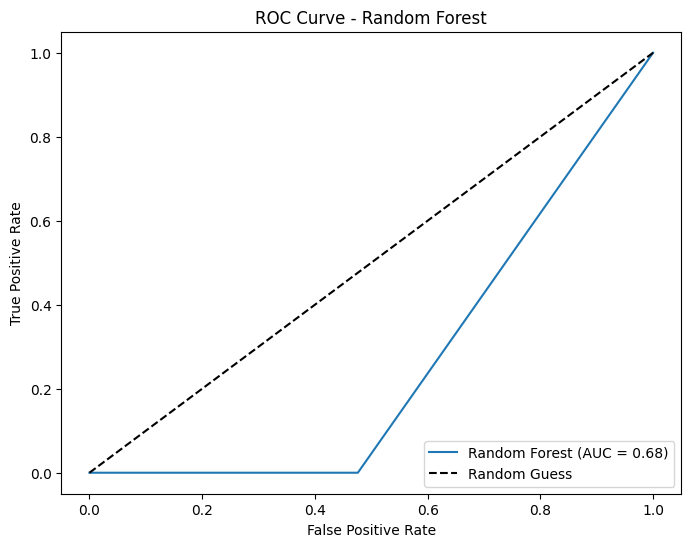

In [99]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Make sure to get the predicted probabilities for the Random Forest model
y_prob_rf = grid_rf.best_estimator_.predict_proba(X_test)  # Predicted probabilities

# Calculate ROC curve for the positive class (class '1' as the positive label)
fpr, tpr, thresholds = roc_curve(y_test, y_prob_rf[:, 1], pos_label=1)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc_score(y_test, y_prob_rf, multi_class="ovr", average="macro"):.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.show()


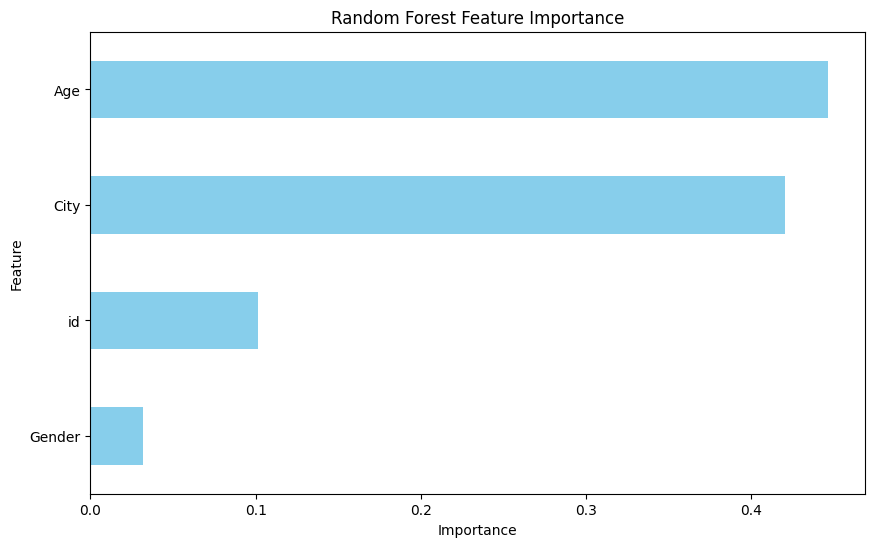

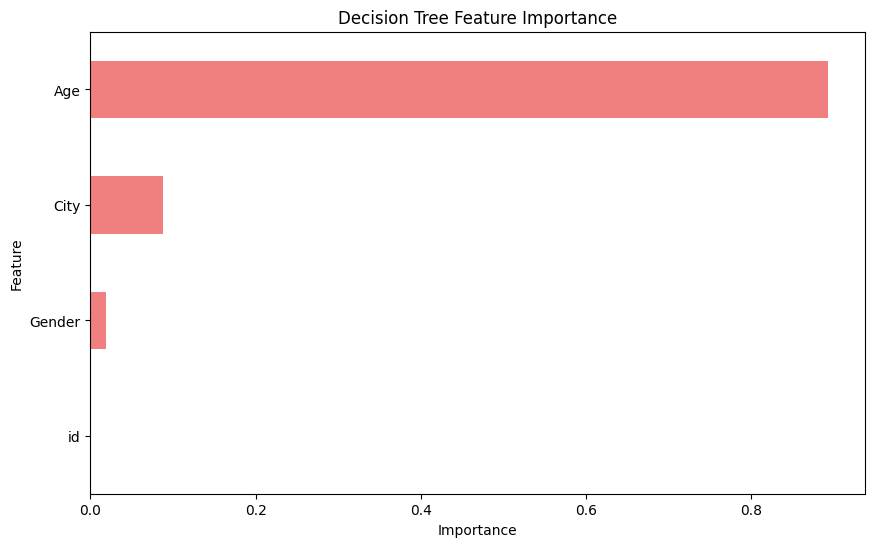

In [100]:
# Ensure the correct feature set is used (X_encoded or the set used by the models)
importances_rf = grid_rf.best_estimator_.feature_importances_

# If you are using X_encoded after one-hot encoding or transformations,
# make sure to align the feature importance to the right feature set.
# In case of mismatch, you can consider selecting the original features (before encoding).

# For Random Forest model:
feature_importance_rf = pd.Series(importances_rf, index=X_encoded.columns[:len(importances_rf)])

# Plot feature importance for Random Forest
plt.figure(figsize=(10, 6))
feature_importance_rf.sort_values(ascending=True).plot(kind='barh', color='skyblue')
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# For Decision Tree model:
importances_dt = model_dt.feature_importances_

# Again, ensure the feature importance corresponds to the correct feature set
feature_importance_dt = pd.Series(importances_dt, index=X_encoded.columns[:len(importances_dt)])

# Plot feature importance for Decision Tree
plt.figure(figsize=(10, 6))
feature_importance_dt.sort_values(ascending=True).plot(kind='barh', color='lightcoral')
plt.title('Decision Tree Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
